<div align="center">
  <h1><b> Quantum Information </b></h1>
  <h2> Bloch Sphere </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [Introduction](#introduction)
- [Statevector Approach](#statevector-approach)
- [Density Operator Approach](#density-operator-approach)
- [Plotting Pure and Mixed States with Qiskit](#plotting-pure-and-mixed-states-with-qiskit)
- [Python Implementation](#python-implementation)

# Introduction

A generic 1-qubit state vector can be associated with a so-called Bloch vector whose coordinates are of a three-dimensional unit sphere (radius $|\vec{r}| = 1$) known as the Bloch sphere.

- Pure states are located on the surface of the Bloch sphere ($|\vec{r}|=1$).
- Mixed states are located inside the Bloch sphere ($|\vec{r}| < 1$).

For historical reasons, the Bloch sphere is also referred to as the Poincaré ball when describing classical polarization states. 

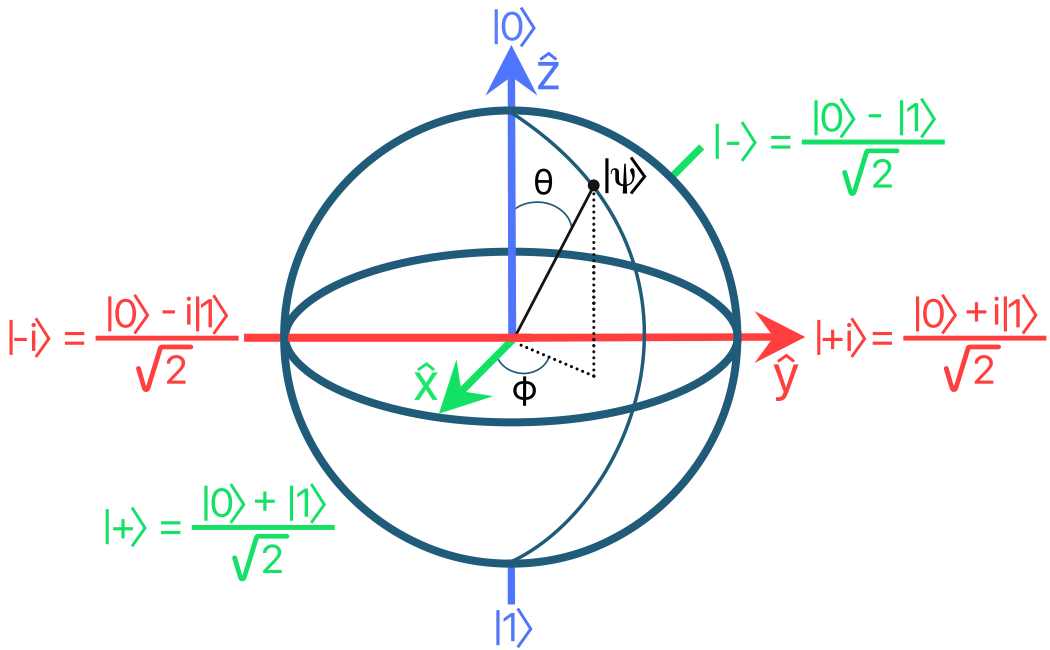

# Statevector Approach

A generic 1-qubit state vector can be written as

\begin{align}
|\psi\rangle_{1qb} &= c_0 |0\rangle + c_1 |1\rangle \\
&= (\alpha_1 + i \beta_1)  |0\rangle +  (\alpha_2 + i \beta_2) |1\rangle \\
&= |c_0| e^{i\phi_0} |0\rangle + |c_1| e^{i\phi_1} |1\rangle \\
&= e^{i\phi_0} \left( |c_0| |0\rangle + |c_1| e^{i (\phi_1 - \phi_0)} |1\rangle \right)\\
&= e^{i\phi_0} \left( |c_0| |0\rangle + |c_1| e^{i \phi} |1\rangle \right).
\end{align}

Where:

- $\phi \doteq \phi_1 - \phi_0$ is a definition.
- $|c_j| e^{i\phi_j}$ follows from the polar form of a complex number given by: $z \equiv \Re(z) + i \Im(z) = |\vec{z}|\cos(\theta)+i|\vec{z}|\sin(\theta) = |\vec{z}|(\cos(\theta)+i\sin(\theta))=|\vec{z}|e^{i\theta}$.

Note that $c_0$ and $c_1$ represent the amplitude probabilities (complex numbers) with $\alpha_j$ and $\beta_j$ real numbers. 

The normalization condition $|c_0|^2 + |c_1|^2 = 1$ and the fact that $ 0 \leq |c_j| \leq 1$, influence the choice:

\begin{align}
    |c_0| &= \cos(\theta/2),\\
    |c_1| &= \sin(\theta/2),
\end{align}

with $\theta \in [0, \pi]$.

The 1-qubit state vector then becomes:

\begin{align}
|\psi\rangle_{1qb} = e^{i\phi_0} \left( \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle \right).
\end{align}

However, qubit states that differ only by a global factor $e^{i\phi_0}$ are physically indistinguishable, i.e, a global factor does not change the measurement outcome:

\begin{align}
    |\langle x |(e^{i\omega} | \psi\rangle)|^2 = |e^{i\phi_0} (\langle x | \psi\rangle)|^2 = |\langle x | \psi\rangle|^2.
\end{align}

With that, one can adopt the following convenient representation for a generic single qubit state vector:

\begin{align}
|\psi\rangle_{1qb} &= \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle \\
&= |c_0| |0\rangle + |c_1| e^{i\phi}|1\rangle,
\end{align}

with $|c_0|, |c_1|, \theta \in \mathbb{R}$, and $0 \leq \theta \leq \pi$, and $0 \leq \phi \leq 2\pi$. 

The factor $e^{i\phi}$ is a complex number with absolute value equal to one ($|e^{i\phi}|=1$) that can be decomposed in terms of sines and cosines using Euler's formula $e^{i\phi} = \cos(\phi) + i\sin(\phi)$. Because of that, the real number $\phi$ is regarded as the relative phase of the wave function in analogy to the phase appearing in the argument of sinusoidal functions describing oscillations, even though no time-dependence and, therefore, no oscillation exists in this case. Whereas $\theta$ gives the probability of each possible measurement outcome:

\begin{align}
    p(|0\rangle)&=|c_0|^2 = \cos^2(\theta/2),\\
    p(|1\rangle)&=|c_1 e^{i\phi}|^2 = |c_1| e^{i\phi} |c_1| e^{-i\phi}=|c_1|^2 = \sin^2(\theta/2).
\end{align}

Since the magnitude of this normalized 1-qubit state vector is equal to one ($\langle \psi | \psi \rangle=1$), the coordinates $\theta$ and $\phi$ can be regarded as spherical coordinates of a unit sphere of radius $||\vec{r}||=1$ and vector:
\begin{align}
    \vec{r} &= ||\vec{r}||\hat{r} =||\vec{r}||(x\hat{x}+y\hat{y}+z\hat{z})  \\
    &= r \sin(\theta)\cos(\phi)\hat{x} + r \sin(\theta)\sin(\phi)\hat{y} + r \cos(\theta)\hat{z} \\
    &= r \begin{pmatrix} \sin(\theta)\cos(\phi) \\ \sin(\theta)\sin(\phi) \\ \cos(\theta) \end{pmatrix}.
\end{align}

# Density Operator Approach

From the density operator formalism, the generic density operator of a single-qubit state (2-level quantum system embedded in $SU(2)$) can be written as:

\begin{align}
    \rho_{1qb} 
    &= \sum_{j_1=0}^{d_1^2-1=3} r_{j_1} \Gamma_{j_1} \\
    &=r_0 \sigma_0 + r_1 \sigma_1+r_2 \sigma_2+r_3 \sigma_3\\
    &= r_0 \sigma_0 + \vec{r}\cdot\vec{\sigma} \\
    &= r_0 \mathbb{I}_2 + \vec{r}\cdot\vec{\sigma}\\
    &= 
r_0 \times    
\begin{bmatrix} 
1 && 0 \\
0 && 1  
\end{bmatrix} 
+ r_1 \times
\begin{bmatrix} 
0 && 1 \\
1 && 0  
\end{bmatrix}
+ r_2 \times
\begin{bmatrix} 
0 && -i \\
i && 0  
\end{bmatrix}
+ r_3 \times
\begin{bmatrix} 
1 && 0 \\
0 && -1  
\end{bmatrix} 
\\
&=
\begin{bmatrix} 
r_0+r_3 && r_1-ir_2 \\
r_1+ir_2 && r_0-r_3  
\end{bmatrix}.
\end{align}

Where:

- $\Gamma_{j_s}$ are the generalized Gell-Mann matrices, which in two dimensions are equivalent to the identity and Pauli $\sigma_{j_s}$-matrices.
- $\vec{\sigma}=\sum_{j=1}^3 \sigma_j \hat{e}_j \in \mathbb{R}^3$ is a 3-dimensional vector whose components are the Pauli matrices.
- $\vec{r}=\sum_{j=1}^3r_j\hat{e}_j \in \mathbb{R}^3$ is the 3-dimensional Bloch's vector.
- $\sigma_0 \doteq \mathbb{I}_2$ denotes the 2x2 identity matrix.

Unit trace condition then implies $r_0 = 1/d_1 = 1/2$, explicitly:

\begin{align}
    Tr(\rho_{1qb})&=(r_0+r_3)+(r_0-r_3)\\
    &=2r_0=1 \\
    &\implies r_0=1/2.
\end{align}

With that, a general 1-qubit state can be rewritten as

\begin{align}
\rho_{1qb} 
&=\frac{1}{2}\mathbb{I}_2 + \vec{r}\cdot\vec{\sigma}\\
&=\frac{1}{2}(\mathbb{I}_2 + 2r_1\sigma_1+2r_2\sigma_2+2r_3\sigma_3)\\
&=\frac{1}{2}(\mathbb{I}_2 + \vec{r}' \cdot \vec{\sigma})\\
&=\frac{1}{2} \big(\mathbb{I}_2 + \langle X\rangle X + \langle Y\rangle Y + \langle Z\rangle Z \big).
\end{align}

While the expectation value of a particular observable can be obtained via the trace function, as follows:

$$\langle \mathcal{O} \rangle = Tr(\mathcal{O} \rho).$$

The eigenvalues of $\rho_{1qb}$ are roots of:
    
\begin{align}
det(\rho_{1qb}-\mathbb{I}_2 \lambda )
&=r_0^2-r_0r_3-r_0\lambda +r_3r_0-r_3^2-r_3\lambda -\lambda r_0+\lambda r_3+\lambda^2 -r_1^2-r_2^2\\
&=\lambda^2-2r_0\lambda+r_0^2 -(r_1^2+r_2^2+r_3^2)= 0.
\end{align}

Making the definitions:

- $\alpha \doteq 1$.
- $b \doteq -2r_0$.
- $c \doteq r_0^2 - (r_1^2+r_2^2+r_3^2)$.

Thus, the eigenvalues are the coefficients:

\begin{align}
\lambda^{\pm}
&= \frac{-b \pm \sqrt{b^2 - 4\alpha c}}{2\alpha} \\
&= \frac{2r_0 \pm \sqrt{(-2r_0^2) - 4 (r_0^2 - (r_1^2+r_2^2+r_3^2))}}{2} \\
&= \frac{2r_0 \pm \sqrt{4 (r_1^2+r_2^2+r_3^2)}}{2} \\
&= r_0 \pm \sqrt{r_1^2+r_2^2+r_3^2} \\
&= \frac{1}{2} \pm \sqrt{r_1^2+r_2^2+r_3^2} \\
&= \frac{1 \pm \sqrt{(2r_1)^2+(2r_2)^2+(2r_3)^2}}{2} \\
&=\frac{1 \pm||\vec{r}'||_2}{2}.
\end{align}

Positiveness of the density operator implies that $\rho_{1qb}$ has non-negative eigenvalues $\lambda_j > 0$.

Hence $1-||\vec{r}'|| \geq 0 \implies ||\vec{r}'|| \leq 1$. Therefore, the coordinates of $\rho_{1qb}$ should be located inside a sphere of radius $||\vec{r}'||=1$.

# Plotting Pure and Mixed States with Qiskit

Using 

\begin{align}
|\psi\rangle_{1qb} &= cos(\theta/2) |0\rangle + e^{i\phi} sin(\theta/2) |1\rangle,
\end{align}

and

\begin{equation}
\vec{r} = \begin{pmatrix} sin(\theta)cos(\phi) \\ sin(\theta)sin(\phi) \\ cos(\theta) \end{pmatrix}.
\end{equation}

The basis states can be obtained from the following choice of coordinates:

\begin{align*}
\theta &=0, \forall \phi \implies \vec{r} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} \text{and } |\psi\rangle =|0\rangle.\\
\theta &=\pi, \forall \phi \implies \vec{r} = \begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix} \text{and } |\psi\rangle = e^{i\phi} |1\rangle.
\end{align*}

And since the factor $e^{i\phi}$ now acts as a global phase it can be neglected. 

The remaining basis are:

\begin{align*}
\theta &=\frac{\pi}{2}, \phi =0 \implies \vec{r}= \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \text{and } |\psi\rangle = |+\rangle,\\
\theta &=\frac{\pi}{2}, \phi =\pi \implies \vec{r}= \begin{pmatrix} -1 \\ 0 \\ 0 \end{pmatrix} \text{and } |\psi\rangle = |-\rangle,\\
\theta &=\frac{\pi}{2}, \phi=\frac{\pi}{2} \implies \vec{r}= \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \text{and } |\psi\rangle = |+i\rangle,\\
\theta &=\frac{\pi}{2}, \phi=\frac{3\pi}{2} \implies \vec{r}= \begin{pmatrix} 0 \\ -1 \\ 0 \end{pmatrix} \text{and } |\psi\rangle = |-i\rangle.\\
\end{align*}

- Plotting pure states (on the surface of the Bloch Sphere with $|\vec{r}| = 1$): 

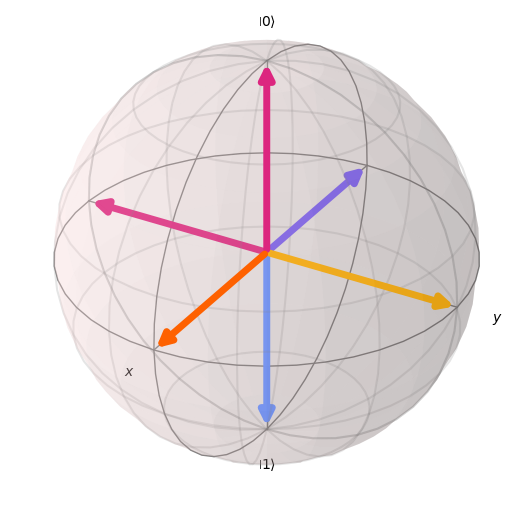

In [17]:
from qiskit.visualization import plot_bloch_vector

# Coordinates of the basis states:

zero = [0,0,1]
one = [0,0,-1]
plus = [1,0,0]
minus = [-1,0,0]
plus_i = [0,1,0]
minus_i = [0,-1,0]

plot_bloch_vector([zero, one, plus, minus, plus_i, minus_i])

- Plotting mixed states (inside the Bloch Sphere with $|\vec{r}| < 1$).

Choosing a single-qubit state whose coordinate is $\vec{r} = (0.5, 0.5, 0)$, where $|\vec{r}| = \sqrt{0.5^2 + 0.5^2 + 0^2} = \sqrt{0.5} = 0.707 < 1$.

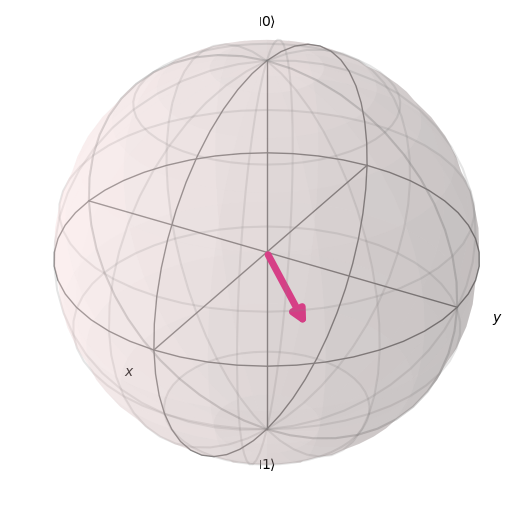

In [18]:
plot_bloch_vector([[0.5,0.5,0]])

# Python Implementation

Recall that a general 1-qubit state can be written as:

$$ \rho = \frac{1}{2} (\mathbb{I} + \langle x \rangle X + \langle y \rangle Y + \langle z \rangle Z) .$$

Let us implement the following pure density operator:

$$ \rho_{|+\rangle} = |+\rangle \langle + | .$$

The corresponding coordinates of the Bloch Sphere are: $\vec{r} = (1, 0, 0)$.

In [1]:
import numpy as np 

# Pauli Matrices:

sigma0 = np.identity(2) 
sigma1 = np.array([[0,1],[1,0]], dtype=(np.float32)) 
sigma2 = np.array([[0,-1j],[1j,0]], dtype=(np.complex64)) 
sigma3 = np.array([[1,0],[0,-1]], dtype=(np.float32)) 

# Bloch Sphere Coordinates:

x_a = 1
y_a = 0 
z_a = 0

# Density Matrix:

rho = (1/2)*(sigma0 + x_a*sigma1 + y_a*sigma2 + z_a*sigma3)
rho


array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

In [2]:
# Does rho satisfy the properties of a density operator?

eigs = np.linalg.eigvals(rho)
print("Trace =", np.trace(rho))
print("Hermitian:", np.allclose(rho, rho.conj().T))
print("Eigenvalues:", eigs)
print("Positive semidefinite:", np.all(eigs >= -1e-12))


Trace = (1+0j)
Hermitian: True
Eigenvalues: [1.0000000e+00+0.j 7.2203753e-33+0.j]
Positive semidefinite: True


In [3]:
# Is rho a pure or mixed density operator?

print("Is rho a pure state?", np.trace(rho @ rho).real == 1)

Is rho a pure state? True


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 